In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 =pd.read_csv("Copy of events.csv")

In [3]:
df1.shape

(3252950, 5)

In [4]:
df2 =pd.read_csv("Copy of gender_age.csv")

In [5]:
df2.shape

(74645, 4)

In [6]:
df3 =pd.read_csv("Copy of phone_device.csv")

In [7]:
df3.shape

(187245, 3)

In [8]:
df4=pd.merge(df1,df2,how="inner")

In [9]:
df=pd.merge(df4,df3,how="inner")

In [10]:
df.shape

(1220474, 10)

In [11]:
df.isnull().sum()

event_id        0
device_id       0
timestamp       0
longitude       0
latitude        0
gender          0
age             0
group           0
phone_brand     0
device_model    0
dtype: int64

In [12]:
len(df[df.duplicated()])

4858

In [13]:
df.drop_duplicates(keep='first',inplace=True)

In [14]:
df.shape

(1215616, 10)

In [15]:
len(df[df.duplicated()])

0

In [16]:
df.columns

Index(['event_id', 'device_id', 'timestamp', 'longitude', 'latitude', 'gender',
       'age', 'group', 'phone_brand', 'device_model'],
      dtype='object')

In [17]:
df.head(3)

,event_id,device_id,timestamp,longitude,latitude,gender,age,group,phone_brand,device_model
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,M,46,M39+,小米,红米note
1,7104,29182687948017175,2016-05-02 09:37:02,121.38,31.24,M,46,M39+,小米,红米note
2,29661,29182687948017175,2016-05-04 00:56:04,121.39,31.23,M,46,M39+,小米,红米note


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215616 entries, 0 to 1220473
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   event_id      1215616 non-null  int64  
 1   device_id     1215616 non-null  int64  
 2   timestamp     1215616 non-null  object 
 3   longitude     1215616 non-null  float64
 4   latitude      1215616 non-null  float64
 5   gender        1215616 non-null  object 
 6   age           1215616 non-null  int64  
 7   group         1215616 non-null  object 
 8   phone_brand   1215616 non-null  object 
 9   device_model  1215616 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 102.0+ MB


In [19]:
df.describe(include='all')

,event_id,device_id,timestamp,longitude,latitude,gender,age,group,phone_brand,device_model
count,1.215616e+06,1.215616e+06,1215616,1.215616e+06,1.215616e+06,1215616,1.215616e+06,1215616,1215616,1215616
unique,NaN,NaN,497663,NaN,NaN,2,NaN,12,89,926
top,NaN,NaN,2016-05-03 10:00:03,NaN,NaN,M,NaN,M39+,华为,荣耀6
freq,NaN,NaN,18,NaN,NaN,864324,NaN,211020,375959,54987
mean,1.626674e+06,-3.106798e+16,NaN,7.839264e+01,2.182718e+01,NaN,3.350004e+01,NaN,NaN,NaN
std,9.396635e+05,5.322372e+18,NaN,5.381290e+01,1.564838e+01,NaN,9.745614e+00,NaN,NaN,NaN
min,1.000000e+00,-9.222957e+18,NaN,-1.800000e+02,-3.380000e+01,NaN,1.100000e+01,NaN,NaN,NaN
25%,8.123215e+05,-4.672948e+18,NaN,0.000000e+00,0.000000e+00,NaN,2.700000e+01,NaN,NaN,NaN
50%,1.627308e+06,-1.173809e+17,NaN,1.127500e+02,2.857000e+01,NaN,3.100000e+01,NaN,NaN,NaN
75%,2.440378e+06,4.631837e+18,NaN,1.171700e+02,3.401000e+01,NaN,3.900000e+01,NaN,NaN,NaN


- Highest value of age is 89 and lowest is 11.
- Most of people in the age group M39+.
- No. of male customers is greater than female customers.

##  Dropping irrelevant columns 

In [20]:
df.drop(columns=["event_id","device_id","timestamp","device_model"],axis=1,inplace=True)

In [21]:
df.head(3)

,longitude,latitude,gender,age,group,phone_brand
0,121.38,31.24,M,46,M39+,小米
1,121.38,31.24,M,46,M39+,小米
2,121.39,31.23,M,46,M39+,小米


## Data Visualization of the data set 

<AxesSubplot:>

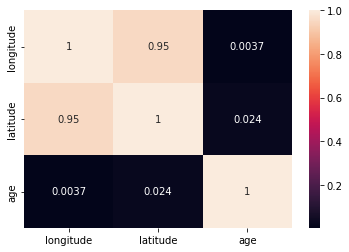

In [22]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:ylabel='Frequency'>

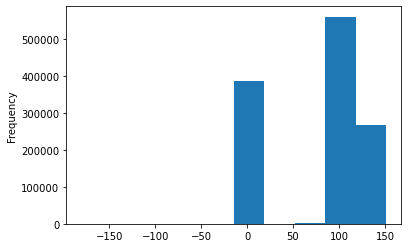

In [23]:
df['longitude'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

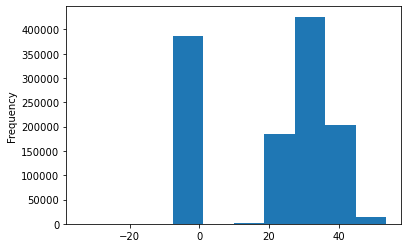

In [24]:
df['latitude'].plot(kind='hist')

In [25]:
sns.set(rc={'figure.figsize':(18,8)})

<AxesSubplot:xlabel='age', ylabel='count'>

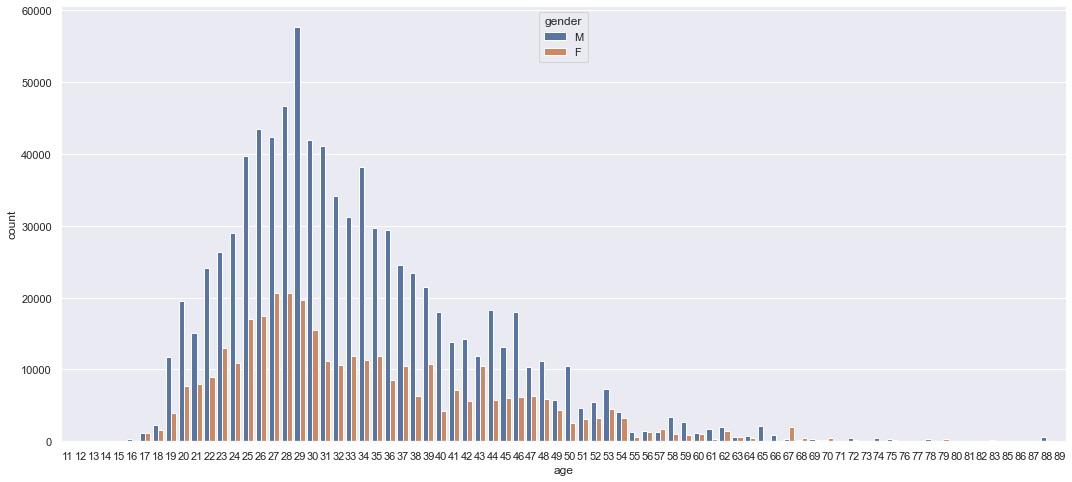

In [26]:
sns.countplot(data = df ,x='age',hue='gender')

<AxesSubplot:xlabel='group', ylabel='count'>

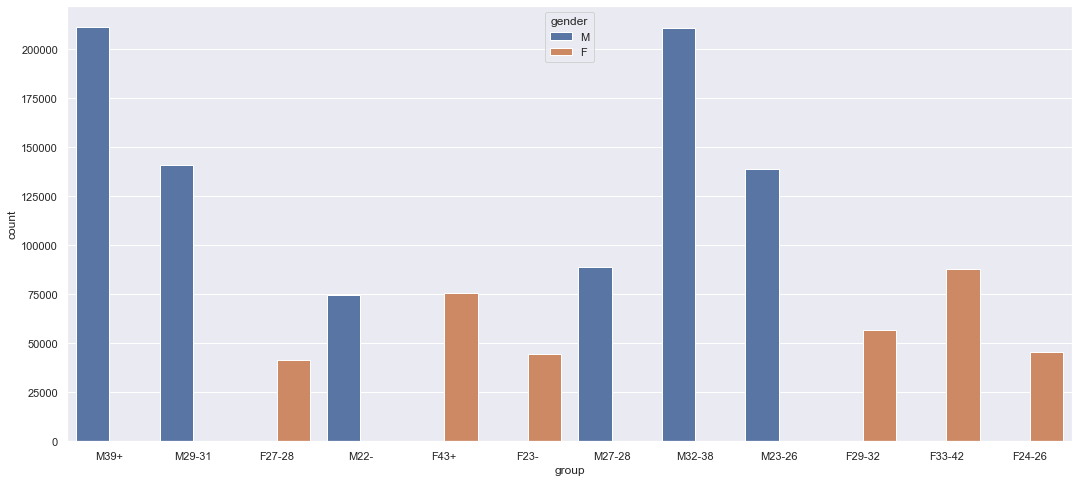

In [27]:
sns.countplot(data = df ,x='group',hue='gender')

##  Encoding the categorical variables 

In [28]:
gender=pd.get_dummies(df['gender'])

In [29]:
gender

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1220469,0,1
1220470,0,1
1220471,0,1
1220472,0,1


In [30]:
df.drop('gender',axis=1,inplace=True)
df=pd.concat([df,gender],axis=1)

In [31]:
df.head(3)

,longitude,latitude,age,group,phone_brand,F,M
0,121.38,31.24,46,M39+,小米,0,1
1,121.38,31.24,46,M39+,小米,0,1
2,121.39,31.23,46,M39+,小米,0,1


In [32]:
df['group'].value_counts()

M39+      211020
M32-38    210708
M29-31    140747
M23-26    138526
M27-28     88984
F33-42     88034
F43+       75376
M22-       74339
F29-32     56863
F24-26     45314
F23-       44497
F27-28     41208
Name: group, dtype: int64

In [33]:
group=pd.get_dummies(df['group'])

In [34]:
df.drop('group',axis=1,inplace=True)
df=pd.concat([df,group],axis=1)

In [35]:
df.shape

(1215616, 18)

In [36]:
phone_brand=pd.get_dummies(df['phone_brand'])

In [37]:
df.drop('phone_brand',axis=1,inplace=True)
df=pd.concat([df,phone_brand],axis=1)

In [38]:
df.shape

(1215616, 106)

In [39]:
df.head(3)

,longitude,latitude,age,F,M,F23-,F24-26,F27-28,F29-32,F33-42,...,酷比魔方,酷派,酷珀,金立,锤子,长虹,青橙,青葱,魅族,鲜米
0,121.38,31.24,46,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,121.38,31.24,46,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,121.39,31.23,46,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df.shape

(1215616, 106)

In [41]:
dfc1=df.copy()

In [42]:
dfc=dfc1.head(1000)

In [43]:
dfc.shape

(1000, 106)

##  Standardizing the data

In [44]:
df.iloc[:,0:3]

,longitude,latitude,age
0,121.38,31.24,46
1,121.38,31.24,46
2,121.39,31.23,46
3,121.38,31.24,46
4,121.16,31.00,46
...,...,...,...
1220469,0.00,0.00,18
1220470,0.00,0.00,21
1220471,0.00,0.00,49
1220472,0.00,0.00,26


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
sc=StandardScaler()
df.iloc[:,0:3]=sc.fit_transform(df.iloc[:,0:3])

In [47]:
df.head(3)

,longitude,latitude,age,F,M,F23-,F24-26,F27-28,F29-32,F33-42,...,酷比魔方,酷派,酷珀,金立,锤子,长虹,青橙,青葱,魅族,鲜米
0,0.798830,0.601520,1.282625,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.798830,0.601520,1.282625,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.799016,0.600881,1.282625,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df.sample(5)

,longitude,latitude,age,F,M,F23-,F24-26,F27-28,F29-32,F33-42,...,酷比魔方,酷派,酷珀,金立,锤子,长虹,青橙,青葱,魅族,鲜米
561954,0.475859,0.522279,0.153911,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
785833,0.751816,0.853943,1.180014,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998325,0.684174,1.184967,-0.359140,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
749971,0.833580,1.277629,-1.180022,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
523666,0.800689,0.602798,2.719169,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X_scaled=df.iloc[:,:].values

In [50]:
X_scaled

array([[ 0.79883037,  0.60152027,  1.28262479, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.79883037,  0.60152027,  1.28262479, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7990162 ,  0.60088122,  1.28262479, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.45676337, -1.39485304,  1.59045569, ...,  0.        ,
         0.        ,  0.        ],
       [-1.45676337, -1.39485304, -0.76958122, ...,  0.        ,
         1.        ,  0.        ],
       [-1.45676337, -1.39485304, -1.38524302, ...,  0.        ,
         0.        ,  0.        ]])

## PCA 

In [51]:
import numpy as np

In [52]:
cov_matrix=np.cov(X_scaled.T)

In [53]:
print(cov_matrix)

[[ 1.00000082e+00  9.49484790e-01  3.68962722e-03 ...  1.12092171e-05
  -1.80428261e-02 -1.43805074e-05]
 [ 9.49484790e-01  1.00000082e+00  2.43944252e-02 ...  2.14477789e-05
  -1.79544015e-02 -1.37693566e-05]
 [ 3.68962722e-03  2.43944252e-02  1.00000082e+00 ... -5.91008442e-07
  -1.89704323e-02 -1.36744909e-05]
 ...
 [ 1.12092171e-05  2.14477789e-05 -5.91008442e-07 ...  3.45492190e-05
  -2.57695051e-06 -3.41065726e-10]
 [-1.80428261e-02 -1.79544015e-02 -1.89704323e-02 ... -2.57695051e-06
   6.90223310e-02 -7.36271575e-07]
 [-1.43805074e-05 -1.37693566e-05 -1.36744909e-05 ... -3.41065726e-10
  -7.36271575e-07  9.87144905e-06]]


In [54]:
eig_val,eig_vec=np.linalg.eig(cov_matrix)

In [55]:
print("Eigen values of the matrix is",'\n',eig_val)

Eigen values of the matrix is 
 [ 1.95516723e+00  1.10052656e+00  4.88627809e-01  2.51419490e-01
  1.66274451e-01  1.50821082e-01  1.17741698e-01  1.03859192e-01
  9.56580373e-02  8.02585623e-02  7.59799982e-02  7.34105478e-02
  6.64363934e-02  6.20468988e-02  4.96870475e-02  4.46861379e-02
  3.92388545e-02  3.68417640e-02  3.46210165e-02  2.71596810e-02
  1.95881530e-02  1.51960459e-02  1.31452408e-02  1.09410898e-02
  9.14609606e-03  7.54559747e-03  5.16758950e-03  4.21693334e-03
  3.87630324e-03  3.65405745e-03  3.10966203e-03  2.54520032e-03
  2.32902913e-03  1.78206885e-03  1.41726459e-03  1.27618100e-03
  1.18733571e-03  9.59642852e-04  8.87985939e-04  7.63108274e-04
  6.52125824e-04  5.94714977e-04  5.91116566e-04  5.49010374e-04
  4.65356504e-04  4.42350236e-04  4.07548100e-04  3.88073464e-04
  2.84199076e-04  1.64864176e-04  1.45948753e-04  1.12072640e-04
  1.04762933e-04  9.41954827e-05  8.11966384e-05  7.18174861e-05
  6.54886062e-05  5.65430583e-05  4.65616884e-05  4.202083

In [56]:
print("Eigen vectors of the matrix is",'\n',eig_vec)

Eigen vectors of the matrix is 
 [[ 7.05879485e-01  2.80255603e-02  7.18054544e-03 ... -6.90536565e-16
   3.07933510e-16 -5.68223882e-16]
 [ 7.05756151e-01  7.53847968e-03  3.71384847e-02 ...  6.64662036e-16
  -3.98151070e-16  3.37531532e-16]
 [ 2.36205196e-02 -9.50650465e-01 -5.76150586e-03 ... -5.72884641e-15
  -1.96404221e-15  2.92308991e-16]
 ...
 [ 1.09992967e-05  1.47580012e-06  7.87798942e-05 ... -5.74996089e-05
  -5.17124844e-02 -9.95800753e-02]
 [-1.40051666e-02  1.97793507e-02 -2.02176206e-02 ... -5.74996089e-05
  -5.17124844e-02 -9.95800753e-02]
 [-1.03450934e-05  1.24523162e-05 -8.37329052e-06 ... -5.74996089e-05
  -5.17124844e-02 -9.95800753e-02]]


In [57]:
total=sum(eig_val)

In [58]:
var_exp=[(i/total)*100 for i in sorted(eig_val,reverse=True)]
print(var_exp)

[38.073822008717414, 21.431032412531163, 9.515261875207813, 4.8960011056247685, 3.237934723856294, 2.937004537235626, 2.2928353078282817, 2.0224952202868205, 1.8627905729121725, 1.5629098978772098, 1.4795915571340488, 1.429555532479225, 1.2937447882580235, 1.2082662508450066, 0.9675774898681242, 0.8701926030783785, 0.7641152821901099, 0.7174356965227705, 0.6741901140525692, 0.5288922835751177, 0.3814486251530369, 0.29591921200211474, 0.2559829925746295, 0.21306060140124164, 0.17810590731265633, 0.1469387019316286, 0.10063071831121972, 0.08211817741821187, 0.07548493919567915, 0.07115705024397614, 0.060555801402467344, 0.049563793074753865, 0.0453541973263834, 0.03470300188207592, 0.027599009958611826, 0.02485162773359583, 0.023121504735560985, 0.01868754271594668, 0.01729213647455343, 0.014860339378485845, 0.012699129850252237, 0.011581143452361234, 0.011511070027976958, 0.010691117828881425, 0.009062089630727271, 0.008614078576866477, 0.007936361441514259, 0.007557123389957266, 0.0055

In [59]:
cum_var_exp=np.cumsum(var_exp)
print(cum_var_exp)

[ 38.07382201  59.50485442  69.0201163   73.9161174   77.15405213
  80.09105666  82.38389197  84.40638719  86.26917776  87.83208766
  89.31167922  90.74123475  92.03497954  93.24324579  94.21082328
  95.08101588  95.84513117  96.56256686  97.23675698  97.76564926
  98.14709789  98.4430171   98.69900009  98.91206069  99.0901666
  99.2371053   99.33773602  99.4198542   99.49533914  99.56649619
  99.62705199  99.67661578  99.72196998  99.75667298  99.78427199
  99.80912362  99.83224512  99.85093266  99.8682248   99.88308514
  99.89578427  99.90736541  99.91887648  99.9295676   99.93862969
  99.94724377  99.95518013  99.96273725  99.96827159  99.97148206
  99.97432418  99.97650662  99.97854672  99.98038103  99.9819622
  99.98336074  99.98463602  99.98573711  99.98664383  99.98746212
  99.98822967  99.9889623   99.9896505   99.99030242  99.99091023
  99.99148684  99.99206339  99.99260704  99.99313557  99.99365206
  99.99414054  99.99461265  99.99507713  99.99552873  99.99596421
  99.9963528

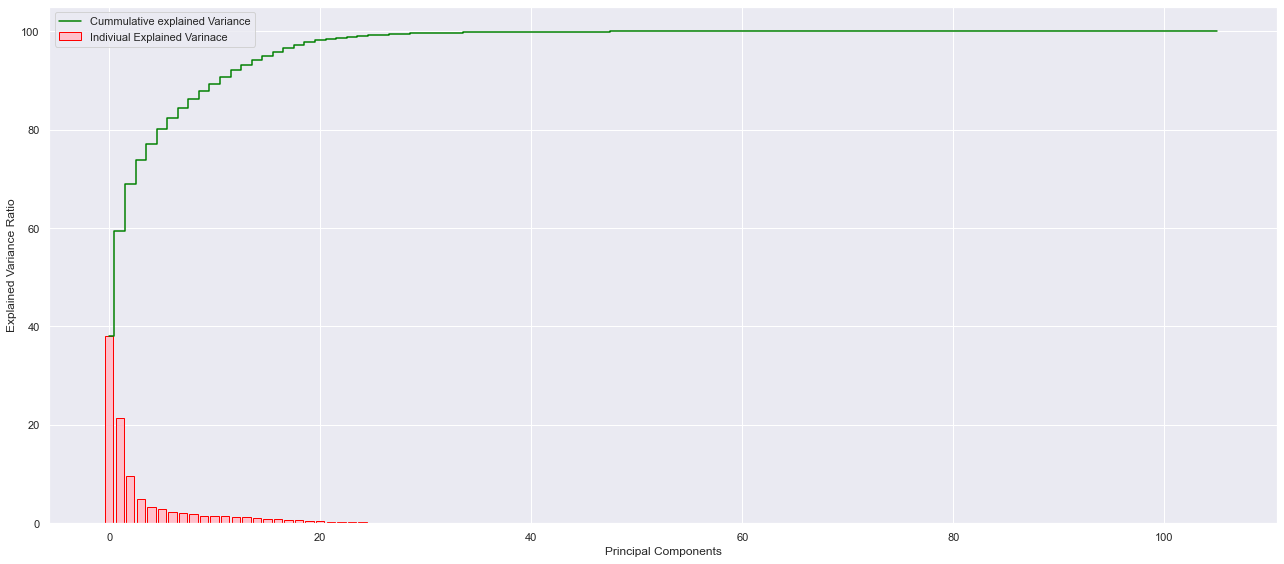

In [60]:
plt.bar(range(106),var_exp, align='center',color='pink',edgecolor='red',label='Indiviual Explained Varinace')
plt.step(range(106),cum_var_exp,where='mid',color='green',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

15 PCA components we should use so that we get 90-95% of the variance in data.

In [61]:
X_scaled

array([[ 0.79883037,  0.60152027,  1.28262479, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.79883037,  0.60152027,  1.28262479, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7990162 ,  0.60088122,  1.28262479, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.45676337, -1.39485304,  1.59045569, ...,  0.        ,
         0.        ,  0.        ],
       [-1.45676337, -1.39485304, -0.76958122, ...,  0.        ,
         1.        ,  0.        ],
       [-1.45676337, -1.39485304, -1.38524302, ...,  0.        ,
         0.        ,  0.        ]])

In [62]:
X_scaled1 = pd.DataFrame(X_scaled,columns=df.columns)

In [63]:
X_scaled1 

,longitude,latitude,age,F,M,F23-,F24-26,F27-28,F29-32,F33-42,...,酷比魔方,酷派,酷珀,金立,锤子,长虹,青橙,青葱,魅族,鲜米
0,0.798830,0.601520,1.282625,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.798830,0.601520,1.282625,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.799016,0.600881,1.282625,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.798830,0.601520,1.282625,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.794742,0.586183,1.282625,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215611,-1.456763,-1.394853,-1.590464,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1215612,-1.456763,-1.394853,-1.282633,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1215613,-1.456763,-1.394853,1.590456,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1215614,-1.456763,-1.394853,-0.769581,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## K-Means and Agglomerative Clustering 

In [64]:
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering

In [65]:
X_scaled_min=X_scaled1.head(1000) #taking a sample of data set

In [66]:
cluster_range = range(1,15)
error=[]

for i in cluster_range:
    clusters = KMeans(i, n_init=10)
    clusters.fit(X_scaled_min)
    labels=clusters.labels_
    centroids=clusters.cluster_centers_
    error.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':error})
clusters_df

,num_clusters,cluster_errors
0,1,3171.528302
1,2,1063.663143
2,3,514.525428
3,4,250.661169
4,5,29.528603
5,6,7.983341
6,7,0.008320
7,8,0.002265
8,9,0.000557
9,10,0.000316


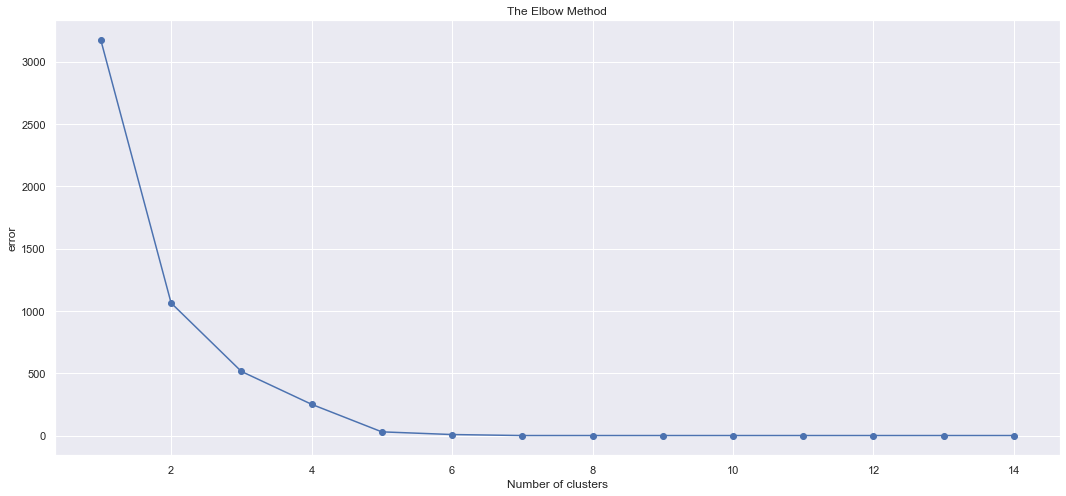

In [67]:
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('error')
plt.show()

In [68]:
kmeans=KMeans(n_clusters=3,n_init=15,random_state=42)
kmeans.fit(X_scaled_min)

KMeans(n_clusters=3, n_init=15, random_state=42)

In [69]:
df_labels=pd.DataFrame(kmeans.labels_,columns=['Labels'])
df_labels

,Labels
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,1


In [70]:
df_labels.value_counts()

Labels
1         496
0         430
2          74
dtype: int64

In [71]:
df_kmeans=dfc.join(df_labels)
df_kmeans.head(3)

,longitude,latitude,age,F,M,F23-,F24-26,F27-28,F29-32,F33-42,...,酷派,酷珀,金立,锤子,长虹,青橙,青葱,魅族,鲜米,Labels
0,121.38,31.24,46,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,121.38,31.24,46,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,121.39,31.23,46,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
from sklearn.metrics import silhouette_score

In [73]:
for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(X_scaled1.head(3000))
    labels = kmeans.predict(X_scaled1.head(3000))
    print(i,silhouette_score(X_scaled1.head(3000),labels))

2 0.4966829896702277
3 0.5459593009602282
4 0.5985512871865102
5 0.6281706963152738
6 0.7163603330133519
7 0.747026508652764
8 0.795038826369378
9 0.8380792634173767
10 0.8533625340251341
11 0.8788232555972927
12 0.9247523500959945
13 0.9394635581235169
14 0.9650015927561723


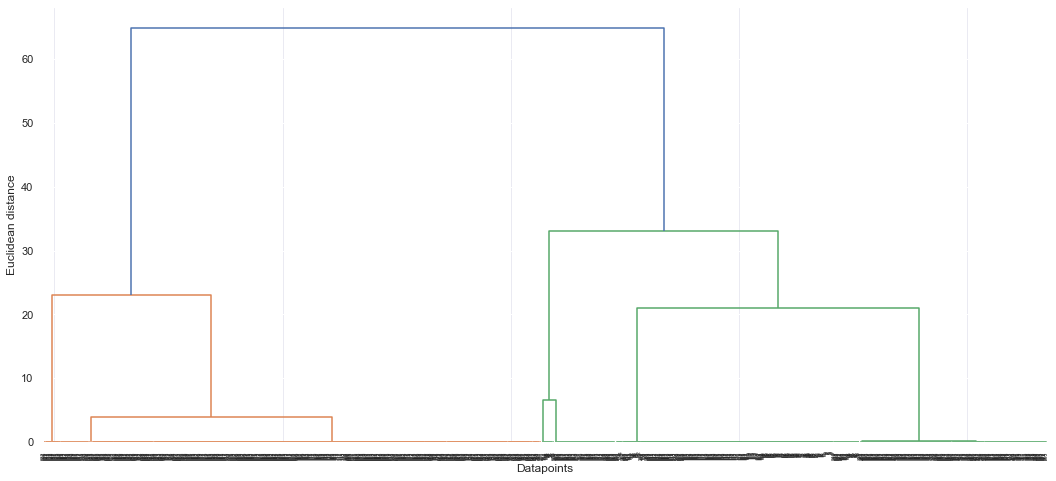

In [74]:
merg=linkage(X_scaled_min,method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [75]:
hie_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',
                                     linkage='ward')

hie_cluster_model = hie_cluster.fit(X_scaled_min)

In [76]:
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(2)

,Labels
0,0
1,0


In [77]:
df_label1.shape

(1000, 1)

In [78]:

df_hier = dfc.join(df_label1)
df_hier.head(3)

,longitude,latitude,age,F,M,F23-,F24-26,F27-28,F29-32,F33-42,...,酷派,酷珀,金立,锤子,长虹,青橙,青葱,魅族,鲜米,Labels
0,121.38,31.24,46,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,121.38,31.24,46,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,121.39,31.23,46,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(X_scaled_min)
    labels = hier.fit_predict(X_scaled_min)
    print(i,silhouette_score(X_scaled_min,labels))

2 0.7312089828674456
3 0.8088630936470297
4 0.8727514607571897
5 0.9861196379969017
6 0.9968212364987353
7 0.9978772371738814
8 0.9922642701923289
9 0.9900736086051609
10 0.8966314846724945
11 0.8942214888984514
12 0.8888782556828722
13 0.8896298729069487
14 0.8984352681582269


From above, we can observe that the silhouette score is high for 5  and 6 clusters

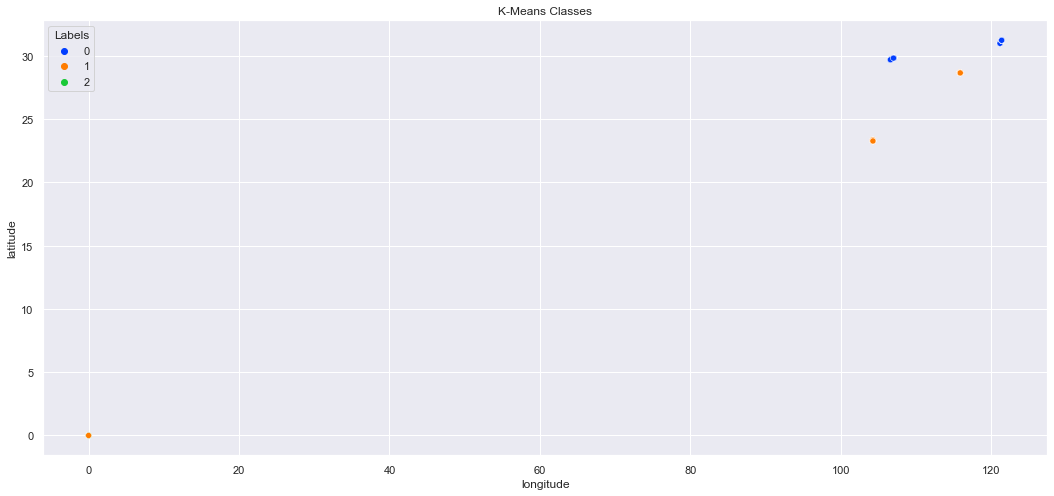

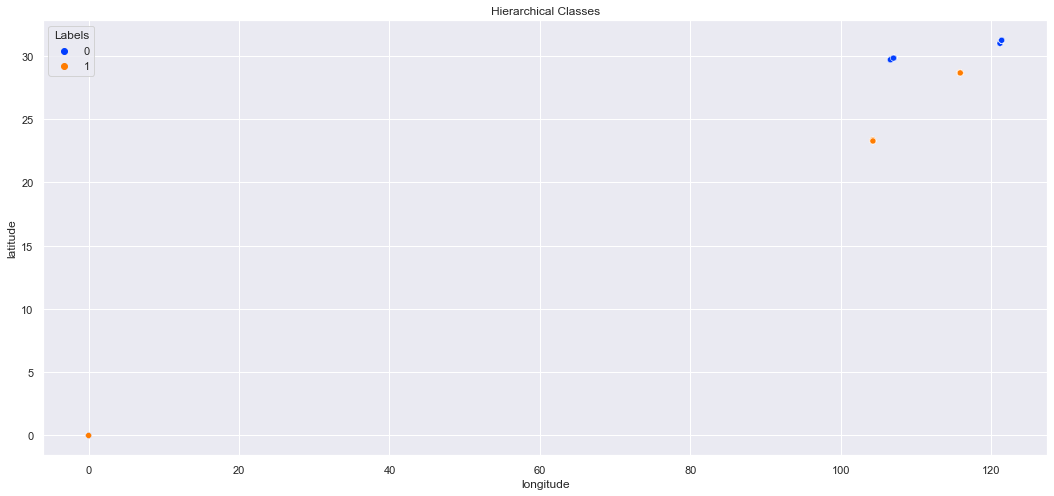

In [81]:
plt.title('K-Means Classes')
sns.scatterplot(x='longitude',y='latitude',hue='Labels',data=df_kmeans,palette='bright')
plt.show()

plt.title('Hierarchical Classes')
sns.scatterplot(x='longitude',y='latitude',hue='Labels',data=df_hier,palette='bright')
plt.show()